## Mini project 6 - History Kaggle Demo: Airbnb New User Bookings

What we need you to learn from this mini project are:

1. Get familiar with the overall procedures of doing a Kaggle Competition (Basic knowledge on data exploration, data preprocessing, modelling and model tuning).
2. Cultivate the sense of data analysis and feature extraction. You should learn to have your own ideas on how to process the data, what kind of features you can extract from the given information, how to dig more possible insights and give solutions from the data ... 
3. Know how to search for useful information and help from related website. You can receive a lot of beautiful insights from the Discussion of the competition.
4. ...

** This Week's Topic：Airbnb New User Bookings **

You can get the detailed information and download the data from the following link:<br/>
https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data

Note: You need to sign up a Kaggle Account before you can download the data.

** Requirements:**<br/>

1. You need to do basic feature engineering, data preprocessing, modelling and model tuning work in this homework.

2. Please **focus more on feature extractions** in this homework, if your time is limited, you don't need to realize all your thoughts, but you need to spend sometime to think about this and give us several thoughts among those you don't realize.

3. This is just a homework, **you don't need to persue the perfect work if your time is limited**, since it will cost you a lot of time to improve it to a relatively good model. Again, this homework is just to nurture your basic sense of doing Kaggle. The real battle will come soon, that's the Kaggle competition you need to spend a lot of time and energies on.

In [1]:
## Type your answers here ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import metrics, preprocessing, cross_validation
from sklearn.model_selection import KFold,GridSearchCV
from xgboost.sklearn import XGBClassifier

%matplotlib inline


/Users/meierhabarexiti/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')
sessions = pd.read_csv('sessions.csv')

labels = train_users['country_destination'].values
id_test = test_users['id']


train_size = train_users.shape[0]
test_size = test_users.shape[0]

In [3]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
train_users.shape

(213451, 16)

In [5]:
train_users.info

<bound method DataFrame.info of                 id date_account_created  timestamp_first_active  \
0       gxn3p5htnn           2010-06-28          20090319043255   
1       820tgsjxq7           2011-05-25          20090523174809   
2       4ft3gnwmtx           2010-09-28          20090609231247   
3       bjjt8pjhuk           2011-12-05          20091031060129   
4       87mebub9p4           2010-09-14          20091208061105   
5       osr2jwljor           2010-01-01          20100101215619   
6       lsw9q7uk0j           2010-01-02          20100102012558   
7       0d01nltbrs           2010-01-03          20100103191905   
8       a1vcnhxeij           2010-01-04          20100104004211   
9       6uh8zyj2gn           2010-01-04          20100104023758   
10      yuuqmid2rp           2010-01-04          20100104194251   
11      om1ss59ys8           2010-01-05          20100105051812   
12      k6np330cm1           2010-01-05          20100105060859   
13      dy3rgx56cu           2

In [6]:
train_users.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [7]:
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [8]:
test_users.shape

(62096, 15)

In [4]:
# merge train and test for the ease of preprocessing, remove id column
users = pd.concat([train_users,test_users],axis=0, ignore_index=True).reset_index(drop= True) # add as rows 
users.drop(['id','country_destination'],axis= 1,inplace=True)
#train_users = train_users.drop(['country_destination'], axis=1)
users.head()

,affiliate_channel,affiliate_provider,age,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


## Missing Values
There are some 'unknown' values in gender. We need to first convert them to NAN, then deal with missing values. 

In [5]:
users.gender.replace('-unknown-',np.nan,inplace=True)

In [11]:
users.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                     129480
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [12]:
## Create a missing_df to store missing values
missing_df = users.isnull().sum().reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
5,first_affiliate_tracked,6085
2,age,116866
8,gender,129480
4,date_first_booking,186639


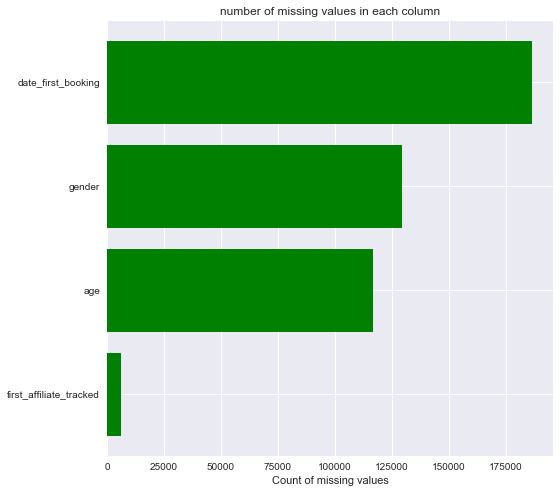

In [13]:
# draw a horizontal bar plot to visualize missing values
ind = np.arange(missing_df.shape[0]) # set colmnames length as the length of y-axis on graph
width = 0.9 # bar width
fig, ax = plt.subplots(figsize=(8,8))
rects= ax.barh(ind,missing_df.missing_count.values,color='green')  # horizontal bar(bar location, values)
ax.set_yticks(ind) # provide an index for each bar
ax.set_yticklabels(missing_df.column_name.values,rotation='horizontal')# label bars into corresponding position
ax.set_xlabel('Count of missing values')
ax.set_title('number of missing values in each column')
plt.show()

In [18]:
test_users.date_first_booking.unique()

array([ nan])

In [6]:
users.drop('date_first_booking',axis=1,inplace= True)

* Date_first_booking feature is NaN for all test users. Therefore, we will not use it for our model building process.
* Both gender and age have a lot of missing values.

### a) age


In [16]:
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [7]:
# set all values outside range(14,100) to be NaN
users.loc[users['age']< 14, 'age'] = np.nan
users.loc[users['age'] > 100, 'age'] = np.nan

In [21]:
users.age.median()

33.0

In [8]:
# set NaN to median age (33)
index = users.age.isnull()
users.loc[index,'age'] = 33

### b) gender

* The majority of gender is NaN
* I set the NaN in gender as 'female', which is the more frequent than male

In [9]:
index = users.gender.isnull()
users.loc[index,'gender']= 'FEMALE'

## Plots

### a ) Categorical features plots

In [10]:
data_types = users.dtypes  
cat_cols = list(data_types[data_types=='object'].index)
con_cols = list(data_types[data_types=='int64'].index) + list(data_types[data_types=='float64'].index)


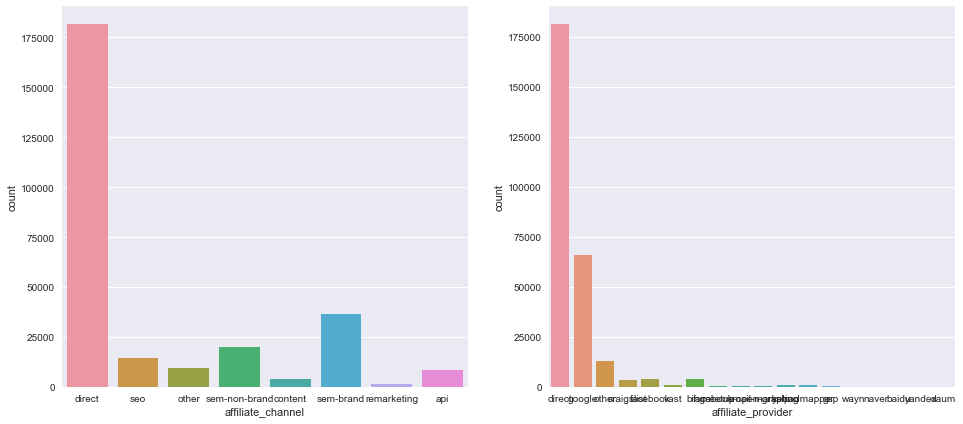

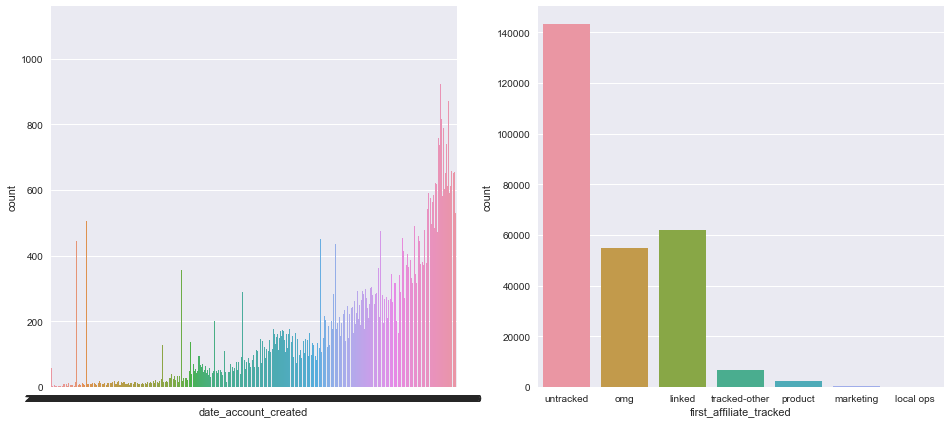

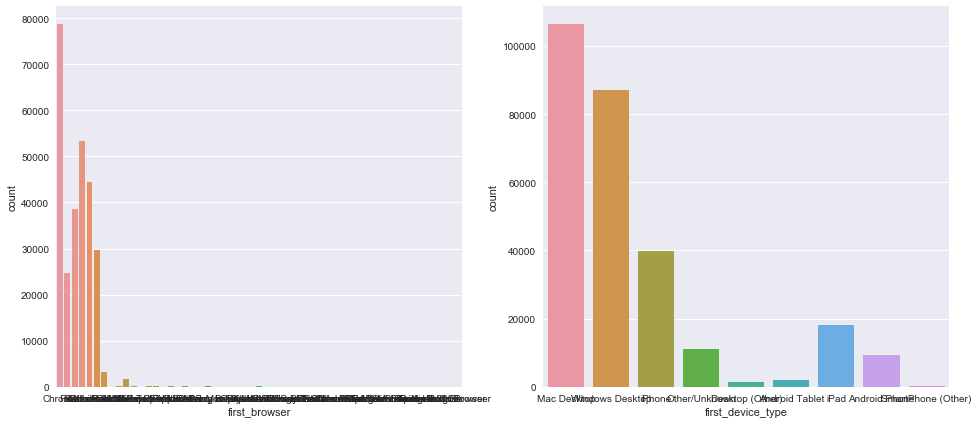

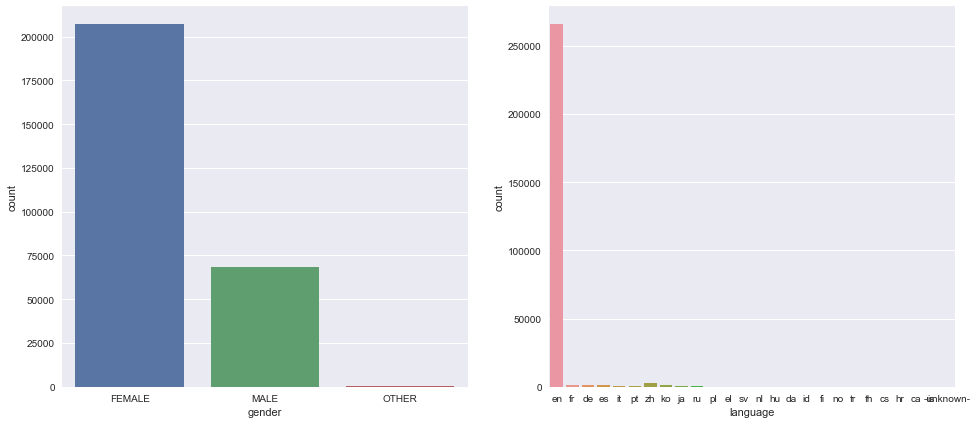

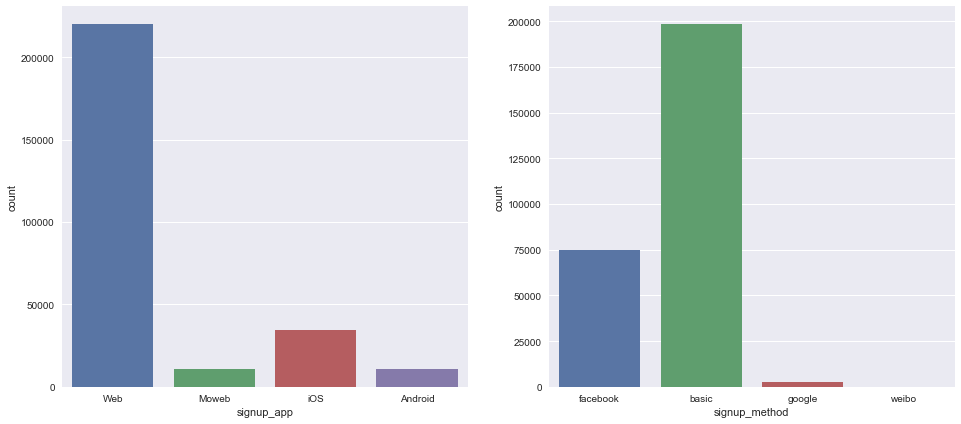

In [25]:
n_cols = 2   #10 cat features
n_rows = 5
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(16,7))
    for j in range(n_cols):
        sns.countplot(x=cat_cols[i*n_cols+j], data=users, ax=ax[j])

* ppl tend to register on facebook a lot more than on google.Yet, registering on Airbnb is the most common.
* ppl like to pay on Airbnb the most, and then using google payment I guess.
* Most ppl used chrome as the first brower and Mac as the first device. 

### b) Numerical data plots

In [22]:
con_cols

['signup_flow', 'timestamp_first_active', 'age']

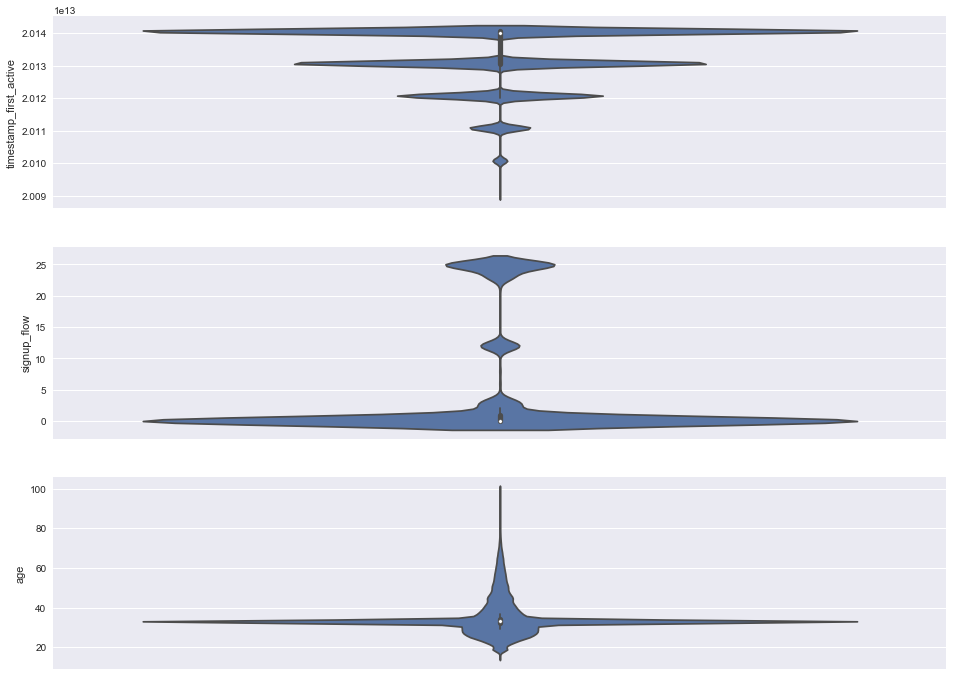

In [175]:
fg,ax = plt.subplots(3,1,figsize=(16, 12))

for i in range(len(con_cols)):
    sns.violinplot(y=con_cols[i], data=users, ax=ax[i])

* None of the numeric features are normally distributed.
* Therefore, transformation and normalization are needed.
* There is a peak for activation in 2014. Maybe because Airbnb was getting more popular.
* The majority of people are aged around 36

### c) Labels plot

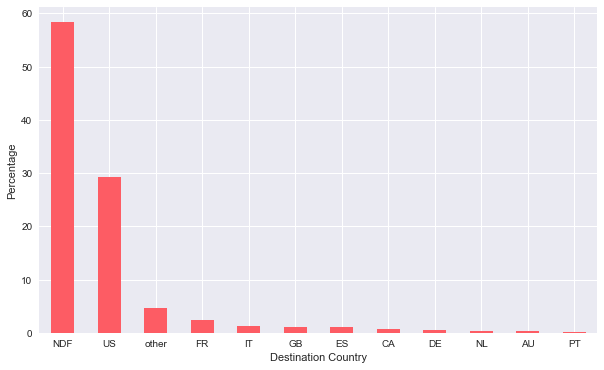

In [26]:
fig = plt.figure(figsize=(10,6))
destination_percentage = train_users.country_destination.value_counts() / train_users.shape[0] * 100
destination_percentage.plot(kind='bar',color='#FD5C64', rot=0)
# Using seaborn can also be plotted
# sns.countplot(x="country_destination", data=users, order=list(users.country_destination.value_counts().keys()))
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

* Most users did not book
* More ppl had booked to US

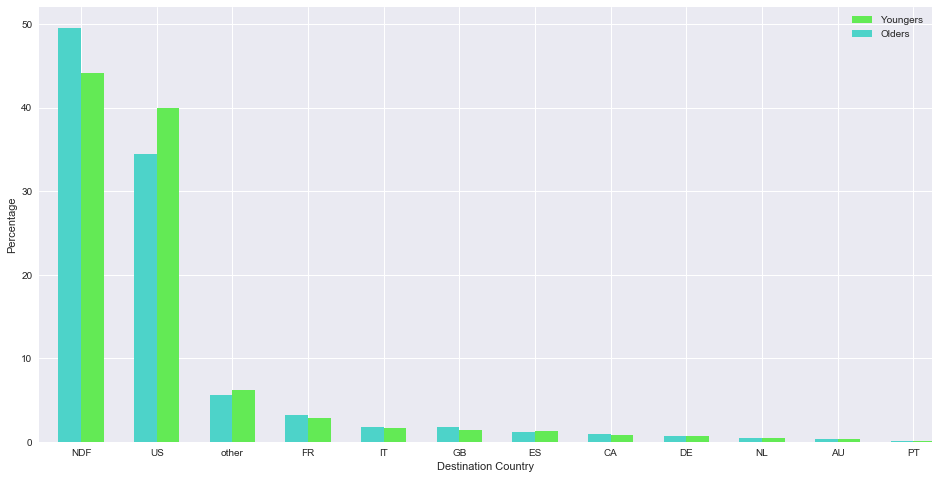

In [33]:
# compare ppl over age of 45 and below
fig = plt.figure(figsize=(16,8))
age = 45

younger = sum(train_users.loc[train_users['age'] < age, 'country_destination'].value_counts())
older = sum(train_users.loc[train_users['age'] > age, 'country_destination'].value_counts())

younger_destinations = train_users.loc[train_users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = train_users.loc[train_users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=0.3, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=0.3, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

## Dates

### a) date_account_created

In [11]:
# Time series plot for account created by time
users['date_account_created'] = pd.to_datetime(users['date_account_created'])

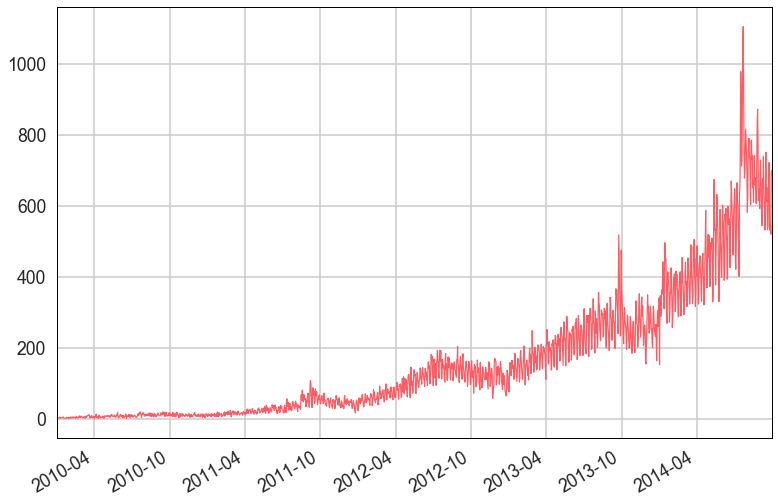

In [73]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

In [12]:
# split date_account_created to year, month, day, added to the dataframe as columns
# alternative: users['date_account_created'] = pd.to_datetime(users['date_account_created'])
dac = np.vstack(users.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
users['dac_year'] = dac[:,0]
users['dac_month'] = dac[:,1]
users['dac_day'] = dac[:,2]
users = users.drop(['date_account_created'], axis=1)

### b) timestamp_first_active

In [13]:
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

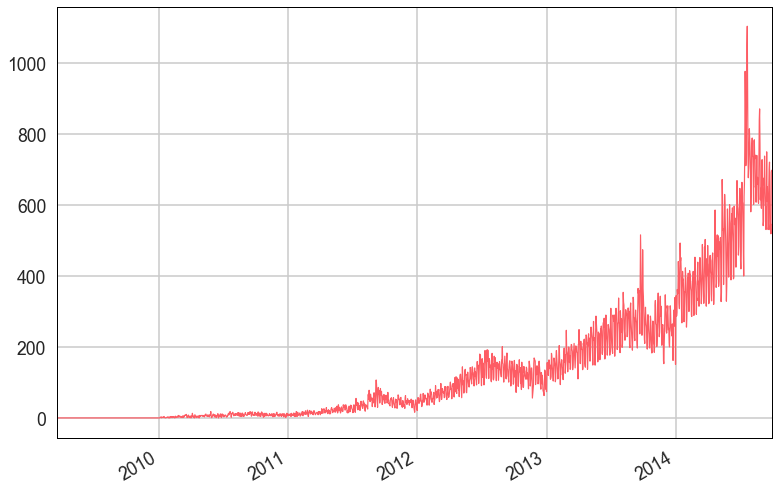

In [78]:
users.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

In [14]:
#timestamp_first_active
#users['date_first_active']=pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')
tfa = np.vstack(users.date_first_active.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
users['tfa_year'] = tfa[:,0]
users['tfa_month'] = tfa[:,1]
users['tfa_day'] = tfa[:,2]
users = users.drop(['timestamp_first_active','date_first_active'], axis=1)

In [30]:
users.head()

,affiliate_channel,affiliate_provider,age,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,direct,direct,33.0,untracked,Chrome,Mac Desktop,FEMALE,en,Web,0,facebook,2010,6,28,2009,3,19
1,seo,google,38.0,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,2011,5,25,2009,5,23
2,direct,direct,56.0,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,2010,9,28,2009,6,9
3,direct,direct,42.0,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,2011,12,5,2009,10,31
4,direct,direct,41.0,untracked,Chrome,Mac Desktop,FEMALE,en,Web,0,basic,2010,9,14,2009,12,8


* Both date_account_created and timestamp_first_active are not stationary. 
* There is a significant trend for those features. 
* We may need log transformation to get rid of trend component


### Questions:
* Q1: But we convert them into int and split into different columns, then no transformation needed?
* Q2: If we need to do transformation, should we do it seperately to year, month and day, or only do it to year?

## Numerical features preprocessing

In [15]:
#Calculate skewness for age: 
from scipy.stats import skew, boxcox
skewed_cols = users[['age']].skew()
print (skewed_cols.sort_values())

age    2.044973
dtype: float64


In [16]:
skewed_cols = skewed_cols[abs(skewed_cols) > 0.25].index.values
users[skewed_cols], lam = boxcox(users[skewed_cols] + 1)

* skewness for age had been improved

In [17]:
# standard scaling
SSL = preprocessing.StandardScaler()
users[skewed_cols]= SSL.fit_transform(users[skewed_cols].values.reshape(-1,1))

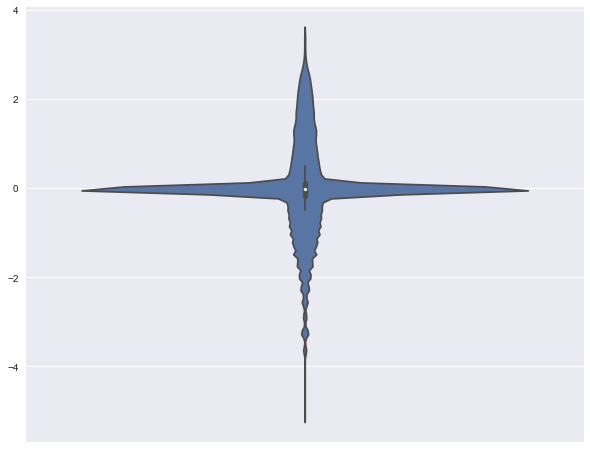

In [42]:
fg,ax = plt.subplots(1,1,figsize=(10, 8))
sns.violinplot(y=skewed_cols, data=users)

## Categorical features preprocessing

### one_hot encoding (factorizing)

In [18]:
cat_cols = cat_cols + list(users['signup_flow'].index)

In [19]:
# use get_dummies features because the data is not big
ohe_feats = ['gender','signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in ohe_feats:
    users_dummy = pd.get_dummies(users[f], prefix=f)
    users = users.drop([f], axis=1)
    users = pd.concat((users, users_dummy), axis=1)

### Questions:
* Q3: I remember TA said that one_hot encoding requires features to be numeric first;
     but for get_dummies, it gives an error if there is numeric values in some features. 
      
      Can I say for get_dummies, all features must be categorical?

## Modeling: XGBClassifier on all training data

### split train and test

In [20]:
#Splitting train and test
vals = users.values # returns an array of every row 
X = vals[:train_size]
le = preprocessing.LabelEncoder()
y = le.fit_transform(labels)  # encode labels  
X_test = vals[train_size:]

### a) NDCG (Normalized discounted cumulative gain) calculation
Note: Returns an error while using this as the objective function in GridSearchCV process. Therefore, not using it here. 

In [26]:
"""Metrics to compute the model performance."""

import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer


def dcg_score(y_true, y_score, k=5):
    """Discounted cumulative gain (DCG) at rank K.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
        Rank.

    Returns
    -------
    score : float
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

In [27]:
def ndcg_score(ground_truth, predictions, k=5):
    """Normalized discounted cumulative gain (NDCG) at rank K.

    Normalized Discounted Cumulative Gain (NDCG) measures the performance of a
    recommendation system based on the graded relevance of the recommended
    entities. It varies from 0.0 to 1.0, with 1.0 representing the ideal
    ranking of the entities.

    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.

    Returns
    -------
    score : float

    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    lb = LabelBinarizer()
    # get first array element of predictions array to correct calculate ground_truth len
    lb.fit(range(len(predictions[0]) + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        
        # HACK: Should not be needed, but in case nothing was relevant
        if best <= 0:
            score = 0.0
        else:
            score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)


# NDCG Scorer function
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

### b) GridSearchCV to find the best model parameter combinations 

In [28]:
def search_model(train_x, train_y, est, param_grid, n_jobs, cv, refit=False):
##Grid Search for the best model
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring    = ndcg_scorer, # change scoring with user define functions
                                     verbose    = 10,
                                     n_jobs  = n_jobs,
                                     iid        = True,
                                     refit    = refit,
                                     cv      = cv)
    # Fit Grid Search Model
    model.fit(train_x, train_y)
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:", model.best_params_)
    print("Scores:", model.grid_scores_)
    return model

In [29]:
param_grid = {'objective':['multi:softprob'], 
              'learning_rate':[0.1],          
              'n_estimators':[100], # number of boosted tress to be fitted 
              'max_depth': [6],
              'min_child_weight':[50],
              'subsample': [0.78],
              'colsample_bytree':[0.5],
              'gamma':[0.9],# Minimum loss reduction required to make a further partition on a leaf node of the tree,                   
              'nthread': [-1],# the larger, the more conservative
              'seed' : [0]}

model = search_model(X,
                     y,
                     XGBClassifier(),
                     param_grid,
                     n_jobs = 1,
                     cv = 3,
                     refit = True)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] colsample_bytree=0.5, gamma=0.9, learning_rate=0.1, max_depth=6, min_child_weight=50, n_estimators=100, nthread=-1, objective=multi:softprob, seed=0, subsample=0.78 
[CV]  colsample_bytree=0.5, gamma=0.9, learning_rate=0.1, max_depth=6, min_child_weight=50, n_estimators=100, nthread=-1, objective=multi:softprob, seed=0, subsample=0.78, score=0.691426, total=12.7min
[CV] colsample_bytree=0.5, gamma=0.9, learning_rate=0.1, max_depth=6, min_child_weight=50, n_estimators=100, nthread=-1, objective=multi:softprob, seed=0, subsample=0.78 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.1min remaining:    0.0s


[CV]  colsample_bytree=0.5, gamma=0.9, learning_rate=0.1, max_depth=6, min_child_weight=50, n_estimators=100, nthread=-1, objective=multi:softprob, seed=0, subsample=0.78, score=0.704535, total=12.9min
[CV] colsample_bytree=0.5, gamma=0.9, learning_rate=0.1, max_depth=6, min_child_weight=50, n_estimators=100, nthread=-1, objective=multi:softprob, seed=0, subsample=0.78 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 26.4min remaining:    0.0s


[CV]  colsample_bytree=0.5, gamma=0.9, learning_rate=0.1, max_depth=6, min_child_weight=50, n_estimators=100, nthread=-1, objective=multi:softprob, seed=0, subsample=0.78, score=0.734989, total=12.7min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 39.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 39.6min finished


Best score: 0.710
Best parameters set: {'colsample_bytree': 0.5, 'gamma': 0.9, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 50, 'n_estimators': 100, 'nthread': -1, 'objective': 'multi:softprob', 'seed': 0, 'subsample': 0.78}
Scores: [mean: 0.71032, std: 0.01825, params: {'colsample_bytree': 0.5, 'gamma': 0.9, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 50, 'n_estimators': 100, 'nthread': -1, 'objective': 'multi:softprob', 'seed': 0, 'subsample': 0.78}]


/Users/meierhabarexiti/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)



### Question: 
* I always have problems with shapes of df or arrays. Any suggestted studying materials or topics on this ? 

* Does XGBoost requires preprocessing the data sets?

* I remember GridSearchCV is looking for the best parameter combination for a model. However, We only assign one set of parameters here (not a range for paramaters). The best parameter it returns is exactly the same as what I 've assigned. 

i) Is it doing any good for choosing the best paramaters combinations?

ii) What is the purpose for doing GridSearch here?

### c) Model fitting XGBClassifier

In [30]:
# use the best parameter combinations from the previous result to fit XGBC model
rgb = XGBClassifier(seed = 0, 
                       learning_rate = 0.1, # smaller, better results, more time
                       n_estimators = 100, # Number of boosted trees to fit.
                       max_depth=6, # the maximum depth of a tree
                       min_child_weight=50,
                       colsample_bytree=0.5, # the fraction of columns to be randomly samples for each tree
                       subsample=0.78, # the fraction of observations to be randomly samples for each tree
                       gamma=0.9, # Minimum loss reduction required to make a further partition on a leaf node of the tree, 
                       # the larger, the more conservative 
                       nthread = -1, # Number of parallel threads used to run xgboost.
                       silent = False # Whether to print messages while running boosting.
                      )
rgb.fit(X, y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.9, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=50, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=0.78)

### d) Predict on test

In [33]:
y_pred = rgb.predict_proba(X_test) 

### e) Taking the 5 classes with highest probabilities

In [34]:
## create submission result 
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

### f) Generate submission

In [35]:
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('sub.csv',index=False)

In [38]:
sub.head()

,id,country
0,5uwns89zht,NDF
1,5uwns89zht,US
2,5uwns89zht,other
3,5uwns89zht,FR
4,5uwns89zht,ES


## Other thoughts

### * I didn't have time to check session data, but according to other ppl on kaggle, it gives more inforamtion about some customers (not all). 
### Therefore, we can also:

1) fit a random forest model using all the session data left_join training data on 'id' (combing session data information with the information for the same people in train_data).

2) fit another random forest model only on the session data. 

3) model ensombling the XGBClassifier model with the models in (1) and (2)

### * Filling missing values:

1) When filling missing values for gender, instead of filling the group with the more counts (female), I think we can also group the country_destination by different genders. Then for each country_destination, we fill gender with the more counts only for that specific country. 

2) I did not have time to create a corr plot. Maybe we can create some columns for  the interaction for different features combinations. 




### Submission yields 0.86522 Score. 